In [1]:
import Pkg;
Pkg.activate("../")
Pkg.update()
Pkg.instantiate()
#Pkg.add(url = "https://github.com/RalphAS/Pseudospectra.jl")

  Activating project at `~/Code/ExperimentsPseudospectra.jl/notebook`
    Updating registry at `~/.julia/registries/General.toml`
    Updating git-repo `https://github.com/RalphAS/Pseudospectra.jl`
  No Changes to `~/Code/ExperimentsPseudospectra.jl/notebook/Project.toml`
  No Changes to `~/Code/ExperimentsPseudospectra.jl/notebook/Manifest-v1.11.toml`
Precompiling project...
   1062.2 ms  ✓ LogExpFunctions → LogExpFunctionsInverseFunctionsExt
    956.5 ms  ✓ StatsFuns → StatsFunsInverseFunctionsExt
   1364.9 ms  ✓ DualNumbers
   1977.6 ms  ✓ Distributions → DistributionsTestExt
   2324.3 ms  ✓ SciMLOperators
   2469.6 ms  ✓ FastGaussQuadrature
    742.2 ms  ✓ SciMLOperators → SciMLOperatorsStaticArraysCoreExt
   3333.7 ms  ✓ RecursiveArrayTools
   1135.5 ms  ✓ SciMLOperators → SciMLOperatorsSparseArraysExt
   4477.6 ms  ✓ DSP
   1354.7 ms  ✓ RecursiveArrayTools → RecursiveArrayToolsFastBroadcastExt
   1358.1 ms  ✓ RecursiveArrayTools → RecursiveArrayToolsStructArraysExt
   1500.8 ms  

In [2]:
using Pseudospectra, Plots

In [3]:
Pkg.status()

Status `~/Code/ExperimentsPseudospectra.jl/notebook/Project.toml`
  [77e4f72b] BallArithmetic v0.1.1
⌅ [d1acc4aa] IntervalArithmetic v0.20.9
  [91a5bcdd] Plots v1.40.13
  [d6c5b33e] Pseudospectra v0.3.0-DEV `https://github.com/RalphAS/Pseudospectra.jl#master`
  [6103b61f] RigorousInvariantMeasures v0.2.3
Info Packages marked with ⌅ have new versions available but compatibility constraints restrict them from upgrading. To see why use `status --outdated`


# Our example

We start by defining the dynamic, a perturbation of the doubling map
$$
T(z) = i z^2 \cdot exp\left[\left(\frac{1}{2}-\frac{\pi}{16}\right)\left(z-\frac{1}{z}\right)\right].
$$

In [4]:
T(z) = im*z^2*exp((1/2-π/16)*(z-1/z))

T (generic function with 1 method)

# Non rigorous exploration of the Pseudospectrum

We fix the truncation size for the Galerkin approximation.

In [5]:
K = 128
N = 2*K+1

257

We start by writing the Blashke product as an interval map

In [6]:
S(x) = 2 * x + (1 / (2 * pi) - 1 / 16) * sin(2 * π * x) + 0.25

S (generic function with 1 method)

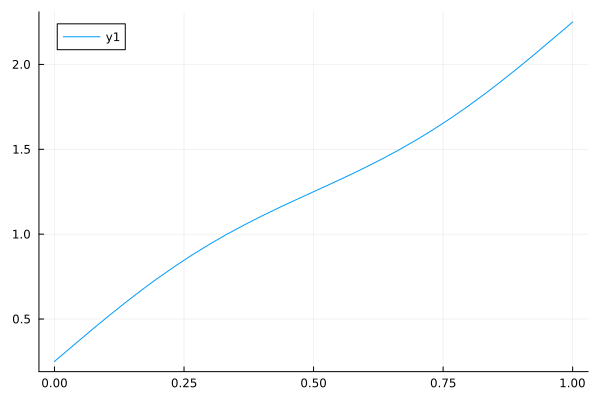

In [7]:
using Plots
plot(S, 0, 1)

In [8]:
using RigorousInvariantMeasures
FourierBasis = RigorousInvariantMeasures.FourierAdjoint(K, 65536)
P = DiscretizedOperator(FourierBasis, S)

┌ Warning: This basis breaks the usual interface of the package, i.e., 
│     the dynamic is input as a function instead than a PwMap
└ @ RigorousInvariantMeasures /home/isaia/.julia/packages/RigorousInvariantMeasures/xFVMn/src/Basis/Fourier/FourierAdjoint.jl:21
┌ Info: Assembling operator, the Newton stopping options are 
│       ϵ = 1.0e-14, max_iter = 100
└ @ RigorousInvariantMeasures /home/isaia/.julia/packages/RigorousInvariantMeasures/xFVMn/src/GenericAssembler.jl:145
┌ Info: 257
└ @ RigorousInvariantMeasures /home/isaia/.julia/packages/RigorousInvariantMeasures/xFVMn/src/Basis/Fourier/FourierCommon.jl:78
┌ Info: 128
└ @ RigorousInvariantMeasures /home/isaia/.julia/packages/RigorousInvariantMeasures/xFVMn/src/Basis/Fourier/FourierCommon.jl:82
Progress: 100%|█████████████████████████████████████████| Time: 0:00:09


NonIntegralPreservingDiscretizedOperator{LinearAlgebra.Adjoint{Complex{Interval{Float64}}, Matrix{Complex{Interval{Float64}}}}, Vector{Float64}, LinearAlgebra.Adjoint{Complex{Interval{Float64}}, Vector{Complex{Interval{Float64}}}}}(Complex{Interval{Float64}}[[0.999999, 1.00001] + [-2.36499e-14, 2.36499e-14]im [-2.36499e-14, 2.36499e-14] + [-2.36499e-14, 2.36499e-14]im … [-2.36499e-14, 2.36499e-14] + [-2.36499e-14, 2.36499e-14]im [-2.36499e-14, 2.36499e-14] + [-2.36499e-14, 2.36499e-14]im; [-2.52676e-14, 2.52736e-14] + [-0.0447012, -0.0447011]im [-2.53228e-14, 2.52184e-14] + [0.289865, 0.289866]im … [-2.5269e-14, 2.52722e-14] + [-0.000347748, -0.000347747]im [-2.52678e-14, 2.52733e-14] + [0.0045597, 0.00455971]im; … ; [-0.00526224, -0.00526223] + [-2.68223e-14, 2.6828e-14]im [0.000647178, 0.000647179] + [-2.68255e-14, 2.68248e-14]im … [-0.162757, -0.162756] + [-2.67593e-14, 2.6891e-14]im [0.0340126, 0.0340127] + [-2.683e-14, 2.68202e-14]im; [-2.52676e-14, 2.52736e-14] + [0.0447011, 0.04

Computing pseudospectra... 100%|████████████████████| Time: 0:00:03


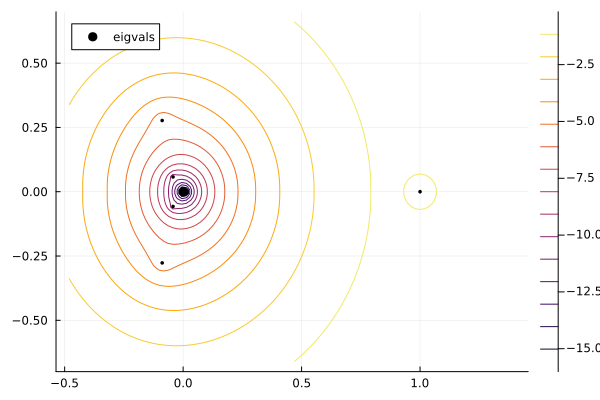

In [9]:
import IntervalArithmetic
midI = IntervalArithmetic.mid
radI = IntervalArithmetic.radius

midP = midI.(real.(P.L)) + im * midI.(imag.(P.L))
spectralportrait(midP)

# Numerical oracle for the constants

In this section we do some numerical computations to narrow down the set of parameters. Later on, we will use self-validated numerical methods (Interval Arithmetic) to certify the 
numerical values we computed now. We do this since numerical computations are inexpensive, while self validated methods may be more time-consuming.

In [10]:
using Plots

In [11]:
Pkg.status()

Status `~/Code/ExperimentsPseudospectra.jl/notebook/Project.toml`
  [77e4f72b] BallArithmetic v0.1.1
⌅ [d1acc4aa] IntervalArithmetic v0.20.9
  [91a5bcdd] Plots v1.40.13
  [d6c5b33e] Pseudospectra v0.3.0-DEV `https://github.com/RalphAS/Pseudospectra.jl#master`
  [6103b61f] RigorousInvariantMeasures v0.2.3
Info Packages marked with ⌅ have new versions available but compatibility constraints restrict them from upgrading. To see why use `status --outdated`


Let $A_{r} = \{z \mid e^{-2\pi r}\leq |z| \leq e^{2\pi r}\}$.

We are interested in finding $\eta$, $\rho$ such that the closure $A_{\rho}$ is contained in $B_{\mu}(A_{\eta})$.
We are interested in maximizing $\alpha-\eta$, since it is the constant appearing in the main error term of our functional analytic treatment, i.e.:
$$
||Lf-L_Kf||_{\mathcal{A}_0}\leq \left(1+\frac{2}{e^{2 \pi (\rho-\alpha)}-1}\right)\left(e^{-2\pi K\alpha}+e^{-2\pi K(\alpha-\eta)}\right)||f||_{\mathcal{A}_{\alpha}}.	
$$

For $\eta>1$ fix
$$
\rho_o(\eta):=\frac{1}{2\pi}\log\left(\min_{\theta \in [0,1]}|B_{\mu}(e^{2\pi\eta} e^{2\pi i \theta})|\right)
$$
where $_0$ stays for outer.
We would like to maximize this function.

In [12]:
ρ_o(η) = log(minimum(abs.(T.([exp(2 * π*(η + im * θ)) for θ in 0:0.001:1]))))/(2*π)

ρ_o (generic function with 1 method)

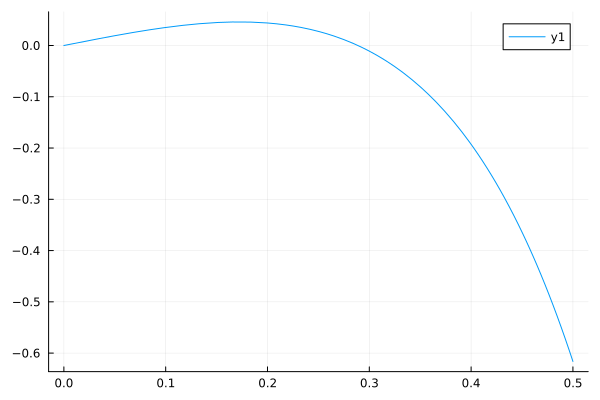

In [13]:
plot(η->ρ_o(η)-η, 0, 0.5)

Similarly, we would like to treat the image inside the circle; for $\eta>1$ we define 
$$
\rho_i(\eta) :=-\frac{1}{2\pi}\log\left(\max_{\theta \in [0, 1]}\left|B_{\mu}(e^{2\pi (-\eta + i \theta)})\right|\right)
$$

In [14]:
ρ_i(η) = -log(maximum(abs.(T.([exp(2 * π*(-η + im * θ)) for θ in 0:0.001:1]))))/(2*π)

ρ_i (generic function with 1 method)

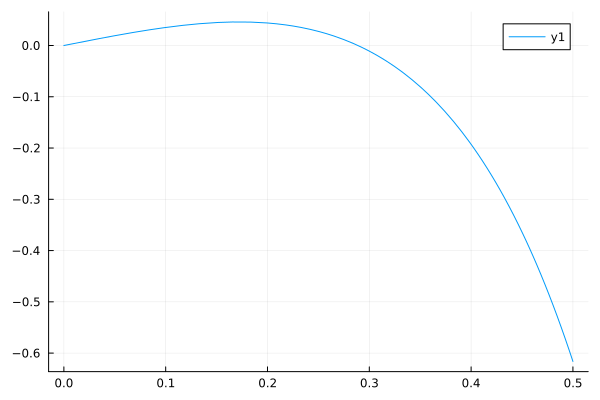

In [15]:
plot(η->ρ_i(η)-η, 0, 0.5)

We define now 
$$
\rho(\eta) = \min\{\rho_i(\eta),\rho_o(\eta)\}-\eta
$$
we have that our dynamic is expanding the annulus when this function is positive.

In [16]:
ρ(η) = min(ρ_i(η), ρ_o(η))

ρ (generic function with 1 method)

We plot now the function 
$$
    \eta \mapsto \rho(\eta)-\eta
$$
our dynamic is expanding the annulus when this function is positive.

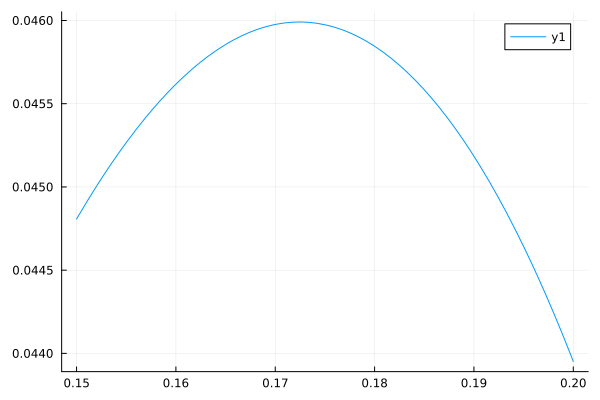

In [17]:
plot(η -> (ρ(η)-η), 0.15, 0.2)

From this non certified plot, we can see that the the difference $\rho(\eta)-\eta$ seems to have a maximum at  
$0.0460$.

We need now to be careful in choosing $\eta$ and $\rho$ in such a way that our computation is well behaved.

By our numerical exploration of the pseudospectrum, we want to isolate the eigenvalues outside of a circle of radius $0.5$.

By Lemma 3.10 and Lemma 3.13, we have that 
$$
\frac{||f||_{\mathcal{A}_{\alpha}}}{||f||_{\mathcal{A}_{0}}}\leq (1/\mu)^{\frac{\alpha}{\alpha-\eta}} \left(1+\frac{2}{e^{2 \pi (\rho - \alpha)} - 1}\right)^{\frac{\alpha}{\alpha-\eta}} 
$$
and
$$
||\mathcal{L}-\mathcal{L}_K||_{\mathcal{A}_{\alpha}\to \mathcal{A}_0}\leq \left(1+\frac{2}{e^{2 \pi (\rho - \alpha)} - 1}\right)\left(e^{-2\pi K\alpha}+e^{-2\pi K(\alpha-\eta)}\right).
$$

We refer to Proposition 2 in the paper, what we would like to control and make small is
$$
||\mathcal{L}-\mathcal{L}_K||_{\mathcal{A}_{\alpha}\to \mathcal{A}_0}\frac{||f||_{\mathcal{A}_{\alpha}}}{||f||_{\mathcal{A}_{0}}};
$$
since $\rho>\alpha$ we have then that $\alpha-\eta$ is at most $0.046$.

To optimize this, we pass to the logarithm.

In [18]:
bound(η, ρ, α; K, μ) =  α/(α-η)*log2(1/μ)+(α/(α-η)+1)*log2(1+2/(exp(2*π*(ρ-α))-1))+log2(exp(-2*π*K*α)+exp(-2*π*K*(α-η)))

bound (generic function with 1 method)

In [20]:
bound_η_α(η, α; K, μ) = bound(η, ρ(η), α; K, μ)

bound_η_α (generic function with 1 method)

In [19]:
function bound_η(η; K, μ)
    η_eps = η+(ρ(η)-η)/100
    ρ_eps = ρ(η)-(ρ(η)-η)/100
    val, index = findmin([bound_η_α(η, α; K, μ) for α in LinRange(η_eps, ρ_eps, 100)])
    return val, LinRange(η_eps, ρ_eps, 100)[index]
end

bound_η (generic function with 1 method)

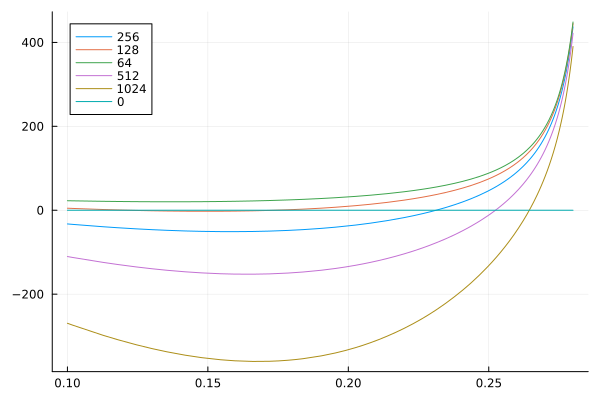

In [21]:
xmin = 0.1
xmax = 0.28
μ = 0.26
plot(η -> bound_η(η; K = 256, μ)[1], xmin, xmax, label = "256")
plot!(η -> bound_η(η; K = 128, μ)[1], xmin, xmax, label = "128")
plot!(η -> bound_η(η; K = 64, μ)[1], xmin, xmax, label = "64")
plot!(η -> bound_η(η; K = 512, μ)[1], xmin, xmax, label = "512")
plot!(η -> bound_η(η; K = 1024, μ)[1], xmin, xmax, label = "1024")
plot!(η -> 0, label = "0")

We choose a discretization size of $K=256$. For this discretization size we fix $\eta = 0.45175$

In [22]:
steps = 200
val, index = findmin([bound_η(η; K = 256, μ)[1] for η in LinRange(0.1, 0.28, steps)])

(-51.0061858411584, 65)

In [23]:
chosen_η = LinRange(0.1, 0.28, steps)[index]
chosen_α = bound_η(chosen_η; K = 256, μ)[2]

0.20066623031194475

By Proposition 3.14, we have that the eigenvalues of modulus bigger than $1/2$ of $\mathcal{L}$ are contained 
in $\sigma_\delta$ for all $\delta\geq 2^{-65}$, where 
$$
\sigma_{\delta} = \sigma(\mathcal{L_K})\cup \{z \in \mathbb{C} \mid z-\mathcal{L}_K\textrm{ is bounded invertible and } |(z-\mathcal{L}_K)^{-1}|> \delta^{-1}|\}
$$

# Certifying the constants

For the specific values of $\alpha$, $\rho$ and $\eta$ computed above, we will certify the value of the constants.

We will repeat the process above to estimate $\rho$, by enclosing the image of the annulus of radius $2\pi\eta$, by using now interval arithmetic to 
obtain guaranteed enclosures.

In [24]:
N = 32768
IΘ = [Interval(i, i+1)/N for i in 0:N-1];

Interval arithmetics....

In [25]:
ρ_o_c(η; IΘ) = log(minimum(abs.(T.([exp(2 * π*(η + im * θ)) for θ in IΘ]))))/(2*π)
ρ_i_c(η; IΘ) = -log(maximum(abs.(T.([exp(2 * π*(-η + im * θ)) for θ in IΘ]))))/(2*π)
ρ_c(η; IΘ) = min(ρ_i_c(η; IΘ), ρ_o_c(η; IΘ))

ρ_c (generic function with 1 method)

For the chosen $\eta$ we have that our oracle for $\rho$ returns

In [26]:
ρ(chosen_η)

0.2033722259334274

The certificate $\rho$ has some overestimates, but we can make this error small by taking a big partition $I\Theta$

In [28]:
ρ_c(chosen_η; IΘ)

[0.203371, 0.203373]

In [27]:
ρ_certified = Interval((ρ_c(chosen_η; IΘ)).lo) 

[0.203371, 0.203372]

After all computations, our chosen $\alpha$, $\eta$ and certified $\rho$ are

In [ ]:
chosen_η, ρ_certified, chosen_α

And the certified bound is 

In [29]:
δ = 2^bound(Interval(chosen_η), ρ_certified, Interval(chosen_α); K = 256, μ)

[4.42438e-16, 4.42439e-16]

# Establishing the enclosing curves

In [30]:
K = 256
FourierBasis = RigorousInvariantMeasures.FourierAdjoint(K, 65536)
P = DiscretizedOperator(FourierBasis, S)
midP = midI.(real.(P.L)) + im * midI.(imag.(P.L))

┌ Warning: This basis breaks the usual interface of the package, i.e., 
│     the dynamic is input as a function instead than a PwMap
└ @ RigorousInvariantMeasures /home/isaia/.julia/packages/RigorousInvariantMeasures/xFVMn/src/Basis/Fourier/FourierAdjoint.jl:21
┌ Info: Assembling operator, the Newton stopping options are 
│       ϵ = 1.0e-14, max_iter = 100
└ @ RigorousInvariantMeasures /home/isaia/.julia/packages/RigorousInvariantMeasures/xFVMn/src/GenericAssembler.jl:145
┌ Info: 513
└ @ RigorousInvariantMeasures /home/isaia/.julia/packages/RigorousInvariantMeasures/xFVMn/src/Basis/Fourier/FourierCommon.jl:78
┌ Info: 256
└ @ RigorousInvariantMeasures /home/isaia/.julia/packages/RigorousInvariantMeasures/xFVMn/src/Basis/Fourier/FourierCommon.jl:82
Progress: 100%|█████████████████████████████████████████| Time: 0:00:12


513×513 Matrix{ComplexF64}:
          1.0+0.0im          …           0.0+0.0im
  3.00818e-18-0.0447011im        2.75267e-18+0.0045597im
  -0.00526223-2.83989e-18im      0.000647179+3.16616e-19im
  1.15502e-21+0.000704313im      4.97524e-18-9.30516e-5im
   9.95789e-5+2.50403e-18im      -1.36658e-5-1.68482e-18im
 -1.02212e-17-1.45163e-5im   …  -1.16606e-17+2.03974e-6im
  -2.15795e-6+1.06413e-17im        3.0814e-7+4.86786e-18im
 -5.62965e-18+3.25184e-7im       1.82744e-17-4.69793e-8im
    4.9495e-8+1.05422e-17im      -7.21415e-9-1.52337e-17im
 -5.12406e-18-7.59141e-9im      -2.95595e-18+1.11421e-9im
             ⋮               ⋱  
 -5.12406e-18+7.59141e-9im      -2.27384e-17-4.88868e-8im
    4.9495e-8-1.05422e-17im  …   -3.18785e-7+8.21404e-18im
 -5.62965e-18-3.25184e-7im       1.63548e-18+2.09485e-6im
  -2.15795e-6-1.06413e-17im       1.39052e-5-7.42826e-18im
 -1.02212e-17+1.45163e-5im      -3.72355e-18-9.35722e-5im
   9.95789e-5-2.50403e-18im     -0.000642212+5.86029e-18im
  1.15502e-2

In [31]:
using LinearAlgebra
F = schur(midP)
eigs = diag(F.T)

513-element Vector{ComplexF64}:
   -0.08839597963168552 - 0.2768737263108055im
   -0.08839597963177268 + 0.2768737263107712im
  -0.042602310497930576 + 0.0574265757155956im
   -0.04260230241483173 - 0.05742657173864414im
    0.02535553024358379 - 0.006528520773145523im
    0.02535213961732259 + 0.0065374008547065005im
   0.023475845388397726 - 0.008170228445463227im
    0.01663412353326848 - 0.018811440657467718im
   0.016626465570170397 + 0.018816598899851485im
    0.02347317353166285 + 0.008182293455312942im
                        ⋮
 1.2900889171701108e-15 - 9.060239626258446e-16im
 -9.289167524782352e-16 + 4.480807304334595e-16im
 -1.110854382876311e-15 - 4.752470625252924e-16im
 1.4939073668383748e-15 - 2.568874132280222e-16im
 -4.405769592747326e-16 - 6.723270749543649e-16im
  -7.15688085586916e-17 + 4.1981380312926544e-16im
  7.436555056518212e-16 + 2.600533108502696e-16im
 3.0712498678131413e-16 - 2.432827950557816e-16im
                    1.0 + 0.0im

The following are the eigenvalues of the Schur decomposition we are using to enclose the spectrum of the abstract operator.

In [32]:
λ_1 = 1.0
λ_2 = eigs[1]
λ_3 = eigs[2]

-0.08839597963177268 + 0.2768737263107712im

We check that the circle of radius $0.26$ effectively cuts off the reset of the eigenvalues of the Schur descomposition.

In [33]:
abs.(eigs)

513-element Vector{Float64}:
 0.29064223632548003
 0.29064223632547387
 0.07150362548976884
 0.071503617479806
 0.026182522747410817
 0.026181455137393242
 0.024856949723387447
 0.025111040705822325
 0.02510983376117719
 0.02485839499719188
 ⋮
 1.5764545141098702e-15
 1.0313402319411832e-15
 1.2082455174319618e-15
 1.5158332242594998e-15
 8.038232098916165e-16
 4.2587054800299147e-16
 7.878142138667294e-16
 3.918064265368497e-16
 1.0

We are going to enclose the eigenvalues by four circles:
* the circle $C_{\gamma_0}$ centered in $0$ with radius $0.26$
* the circle $C_{\gamma_1}$ centered at $\lambda_1$ with radius $0.01$
* the circle $C_{\gamma_2}$ centered at $\lambda_2$ with radius $0.01$
* the circle $C_{\gamma_3}$ centered at $1$ with radius $0.1$

This computation is quite expensive, but we ran an example of it in this notebook to show how it works.
In the directory *ExperimentsPseudospectra.jl/scripts/Arnold* the scripts that run these computations using parallelization can be found,
for local computation and computation on a slurm cluster.

This is the typical output of the computation, here certifying the eigenvalue at $1$

```┌ Info: Added 8 processes
└ @ Main /home/isaia/Code/ExperimentsPseudospectra.jl/scripts/Arnold/local/setup.jl:17
AMD Ryzen 5 5600 6-Core Processor: 
          speed         user         nice          sys         idle          irq
#1-12  4441 MHz     134692 s        120 s     121729 s     627092 s          0 s
┌ Info: Switching to OpenBLAS with ConsistentFPCSR = 1 flag enabled, guarantees
│         correct floating point rounding mode over all threads.
└ @ BallArithmetic /home/isaia/.julia/packages/BallArithmetic/nPayJ/src/BallArithmetic.jl:20
┌ Info: OpenBLAS is giving correct rounding on a (1024,1024) test matrix on 6 threads
└ @ BallArithmetic /home/isaia/.julia/packages/BallArithmetic/nPayJ/src/BallArithmetic.jl:27
┌ Info: Schur decomposition errors
└ @ Main /home/isaia/Code/ExperimentsPseudospectra.jl/scripts/Arnold/local/setup.jl:33
┌ Info: ("E_M", 4.362697431116958e-13)
└ @ Main /home/isaia/Code/ExperimentsPseudospectra.jl/scripts/Arnold/local/setup.jl:38
┌ Info: ("E_T", 5.447296963610192e-9)
└ @ Main /home/isaia/Code/ExperimentsPseudospectra.jl/scripts/Arnold/local/setup.jl:39
┌ Info: ("norm_Z", Ball{Float64, Float64}(1.000000000000006, 2.336908444533492e-12))
└ @ Main /home/isaia/Code/ExperimentsPseudospectra.jl/scripts/Arnold/local/setup.jl:40
┌ Info: ("norm_Z_inv", Ball{Float64, Float64}(1.0000000000000058, 2.3373525337433425e-12))
└ @ Main /home/isaia/Code/ExperimentsPseudospectra.jl/scripts/Arnold/local/setup.jl:41
┌ Info: ("Certifying ", 1.0, "radius", 0.1, "radius pearl", 0.049000000000000016)
└ @ Main /home/isaia/Code/ExperimentsPseudospectra.jl/scripts/Arnold/local/run_Arnold_one.jl:11
┌ Info: 13 svd need to be computed to certify the arc centered at 1.0, with radius 0.1, with pearls of size 0.049000000000000016
└ @ Main /home/isaia/Code/ExperimentsPseudospectra.jl/scripts/script_functions.jl:37
┌ Info: with start angle 0 and stop angle 6.283185307179586
└ @ Main /home/isaia/Code/ExperimentsPseudospectra.jl/scripts/script_functions.jl:38
┌ Info: Jobs submitted to the queue
└ @ Main /home/isaia/Code/ExperimentsPseudospectra.jl/scripts/script_functions.jl:42
┌ Info: The minimum singular value along the arc centered at 1.0, with radius 0.1, with pearls of size 0.049000000000000016 with start angle 0 and stop angle 6.283185307179586 is 0.050388243829828226, the maximum of the l2 pseudospectra is bounded by 19.84589904298336
└ @ Main /home/isaia/Code/ExperimentsPseudospectra.jl/scripts/script_functions.jl:81
┌ Info: ("Average time for certifying an SVD", 10.905107298384618)
└ @ Main /home/isaia/Code/ExperimentsPseudospectra.jl/scripts/script_functions.jl:83
┌ Info: ("Total time for certifying the arc", 20.453904849)
└ @ Main /home/isaia/Code/ExperimentsPseudospectra.jl/scripts/script_functions.jl:84
┌ Info: ("The norm of the resolvent for the discretized operator is", 898.9997063371694)
└ @ Main /home/isaia/Code/ExperimentsPseudospectra.jl/scripts/Arnold/local/cleaning.jl:10```